# Data visualizations

### Imports

In [107]:
import pandas as pd
import numpy as np

### Load data

In [108]:
df_m = pd.read_csv("data/Test_Movements.csv", sep=";")
df_p = pd.read_csv("data/pathpoints.csv", sep=";")

### Extend data

In [109]:
df_m.shape

(16475, 10)

In [110]:
# Compute duration and speed for each movement
df_m["duration"] = (pd.to_datetime(df_m["end_time"]) - pd.to_datetime(df_m["start_time"])).dt.total_seconds()
df_m["speed"] = df_m["distance(m)"] / df_m["duration"]

In [111]:
# Get distance in km and speed in km/h
df_m["distance_km"] = df_m["distance(m)"] / 1000
df_m["speed_kmh"] = df_m["speed"] * 3.6
df_m["duration_h"] = df_m["duration"] / 3600
df_m["duration_m"] = df_m["duration"] / 60

In [112]:
# Transform mode of tansport to simplified version (Electric car -> car, electric bike -> on_bicycle, etc.)
mot_converter = {
    "ELECTRIC_CAR": "CAR",
    "HYBRID_CAR": "CAR",
    "CAR" : "CAR",
    "ELECTRIC_BIKE": "ON_BICYCLE",
    "ON_BICYCLE": "ON_BICYCLE",
    "SCOOTER": "ON_BICYCLE",
    "TRAM": "TRAM",
    "BUS": "BUS",
    "ELECTRIC_BUS": "BUS",
    "COACH": "BUS",
    "WALKING": "WALKING",
    "TRAIN": "TRAIN",
    "BOAT": "BOAT",
    "BOAT_NO_ENGINE": "BOAT",
    "PLANE": "PLANE",
    "DETECTION_ERROR": "DETECTION_ERROR"
}
df_m["mot_general"] = df_m["mean_of_transport"].map(mot_converter)

In [113]:
df_m.shape

(16475, 17)

### Clean data

In [114]:
# Remove movements with a too high duration or speed
max_durations = {
    "CAR": 20 * 60 * 60,
    "ON_BICYCLE": 10 * 60 * 60,
    "TRAM": 1 * 60 * 60,
    "BUS": 20 * 60 * 60,
    "WALKING": 10 * 60 * 60,
    "TRAIN": 20 * 60 * 60,
    "BOAT": 20 * 60 * 60,
    "PLANE": 20 * 60 * 60,
    "DETECTION_ERROR": 20 * 60 * 60
}
max_speeds = {
    "CAR": 300 / 3.6,
    "ON_BICYCLE": 50 / 3.6,
    "TRAM": 100 / 3.6,
    "BUS": 130 / 3.6,
    "WALKING": 20 / 3.6,
    "TRAIN": 300 / 3.6,
    "BOAT": 100 / 3.6,
    "PLANE": 1000 / 3.6,
    "DETECTION_ERROR": 200 / 3.6
}

df_m = df_m[
    (df_m["duration"] < df_m["mot_general"].map(max_durations)) &
    (df_m["speed"] < df_m["mot_general"].map(max_speeds))
]
df_m.shape

(16277, 17)

In [115]:
# Remove detection errors
df_m = df_m[df_m["mot_general"] != "DETECTION_ERROR"]
df_m.shape

(16209, 17)

### Modes of transport distribution

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

/var/folders/hc/bxt7k06n5532f1ws84vbg7180000gn/T/ipykernel_30618/4225548232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


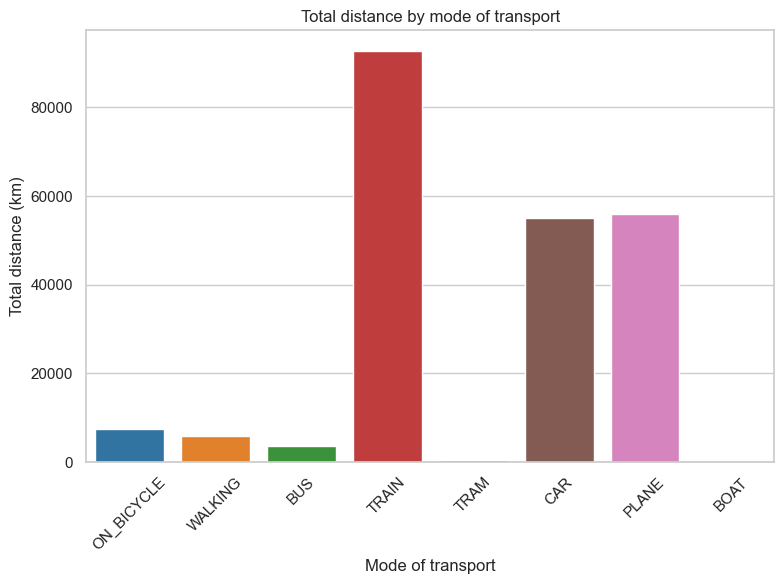

In [117]:
# Plot the modes of transport - by total distance
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x="mot_general",
    y="distance_km",
    data=df_m,
    estimator=sum,
    errorbar=None,
    palette="tab10"  # Use a categorical color palette
)
plt.title("Total distance by mode of transport")
plt.xlabel("Mode of transport")
plt.ylabel("Total distance (km)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/hc/bxt7k06n5532f1ws84vbg7180000gn/T/ipykernel_30618/3932684077.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


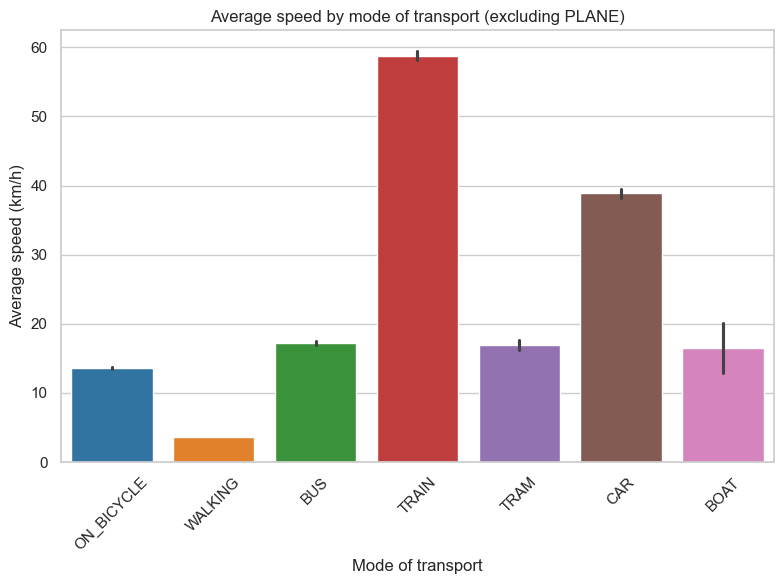

In [118]:
# Plot average speed by mode of transport, excluding PLANE
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x="mot_general",
    y="speed_kmh",
    data=df_m[df_m["mot_general"] != "PLANE"],
    estimator=np.mean,
    errorbar="se",
    palette="tab10"
)
plt.title("Average speed by mode of transport (excluding PLANE)")
plt.xlabel("Mode of transport")
plt.ylabel("Average speed (km/h)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/hc/bxt7k06n5532f1ws84vbg7180000gn/T/ipykernel_30618/2404654634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


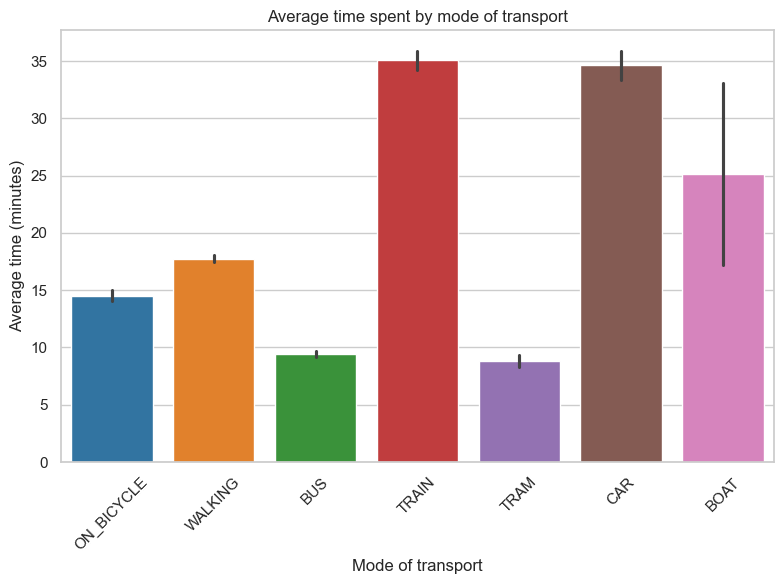

In [119]:
# Average time spent by mode of transport
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x="mot_general",
    y="duration_m",
    data=df_m[df_m["mot_general"] != "PLANE"],
    estimator=np.mean,
    errorbar="se",
    palette="tab10"
)
plt.title("Average time spent by mode of transport")
plt.xlabel("Mode of transport")
plt.ylabel("Average time (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/hc/bxt7k06n5532f1ws84vbg7180000gn/T/ipykernel_30618/1858522163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


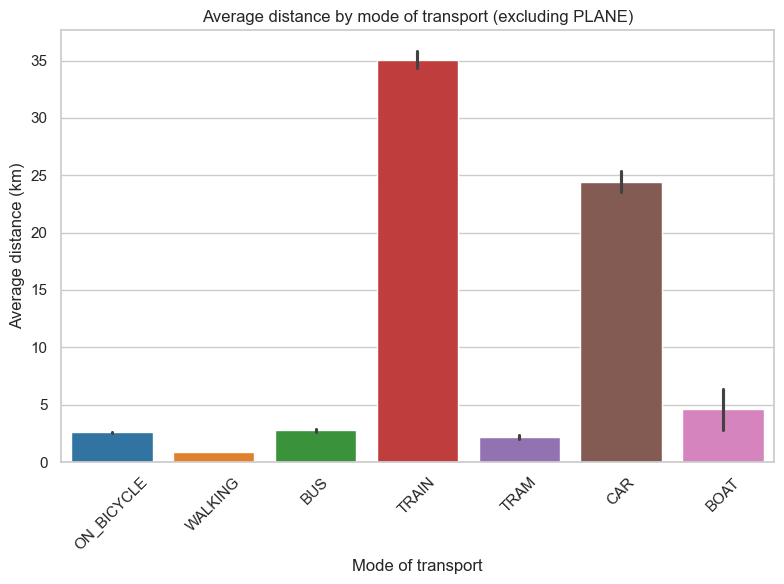

In [120]:
# Average distance by mode of transport - excluding PLANE
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x="mot_general",
    y="distance_km",
    data=df_m[df_m["mot_general"] != "PLANE"],
    estimator=np.mean,
    errorbar="se",
    palette="tab10"
)
plt.title("Average distance by mode of transport (excluding PLANE)")
plt.xlabel("Mode of transport")
plt.ylabel("Average distance (km)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

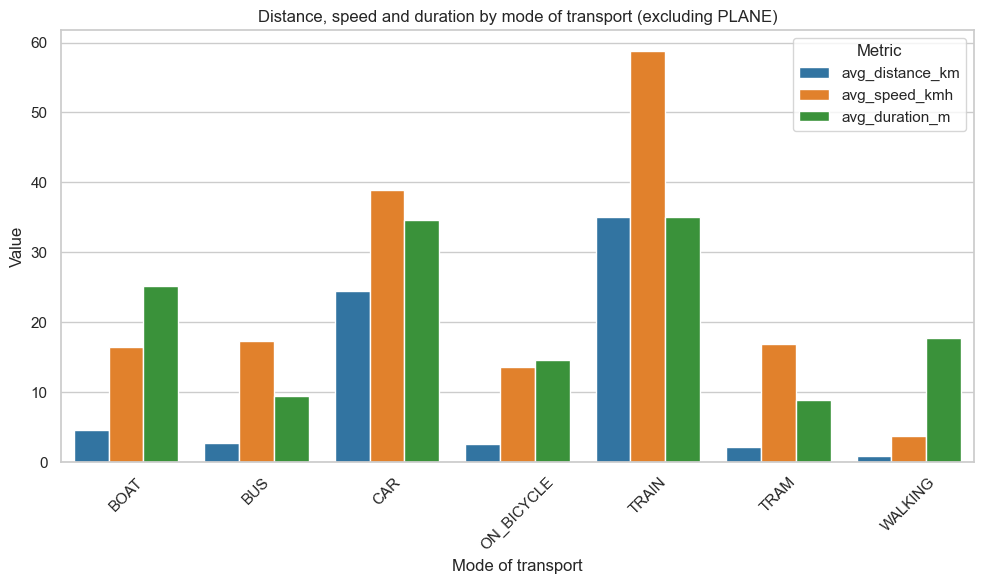

In [121]:
## Put distance, speed and duration in one plot, grouped by mode of transport
df_m_grouped = df_m.groupby("mot_general").agg(
    avg_distance_km=("distance_km", "mean"),
    avg_speed_kmh=("speed_kmh", "mean"),
    avg_duration_m=("duration_m", "mean")
).reset_index()
df_m_grouped = df_m_grouped.melt(id_vars="mot_general", var_name="metric", value_name="value")
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="mot_general",
    y="value",
    hue="metric",
    data=df_m_grouped[df_m_grouped["mot_general"] != "PLANE"],
    palette="tab10"
)
plt.title("Distance, speed and duration by mode of transport (excluding PLANE)")
plt.xlabel("Mode of transport")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()